# **Reduccion de dimension PCA**
#### by: Daniel Escobar and Catalina Bustamante

It is a mathematical procedure that transforms a set of **CORRELATED** variables into a set of new **UNCORRELATED** variables called principal components, in order to reduce the size of the data and facilitate its interpretation and analysis.

The idea is to maximize the variance of a linear combination of variables:

$$\mathbf{Y}_1 = \mathbf{a}_1^T \mathbf{X} = a_{11}X_1 + a_{12}X_2 + ... + a_{1p}X_p$$
$$\mathbf{Y}_2 = \mathbf{a}_2^T \mathbf{X} = a_{21}X_1 + a_{22}X_2 + ... + a_{2p}X_p$$
$$ ... $$
$$\mathbf{Y}_p = \mathbf{a}_p^T \mathbf{X} = a_{p1}X_1 + a_{p2}X_2 + ... + a_{pp}X_p$$
\\
$$\mathbf{A}=\begin{bmatrix}
a_{11} & a_{21}  & ... & a_{p1} \\ 
a_{21} & a_{22} & ...  & a_{p2}\\ 
 ... & ... & ...  & ... \\ 
 a_{1p}& a_{2p} & ...  & a_{pp}
\end{bmatrix}$$

Where $\mathbf{A}$ is a orthogonal matrix $\mathbf{A}\mathbf{A}^T = \mathbf{I}$

#### Dimension reduction using the Iris database 



*   Import the dataset 

##**Iris data set** 
created by R.A. Fisher

|  |     |
|--- |----------|
| Number of class | 3 (Iris-setosa, Iris-versicolor, Iris-virginica)|
| Number of attributes |4 (sepal-length, sepal-width, petal-length, petal-width) |
| Number of Samples | 150 (balanced classes)|

In [0]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

*   Check correlation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


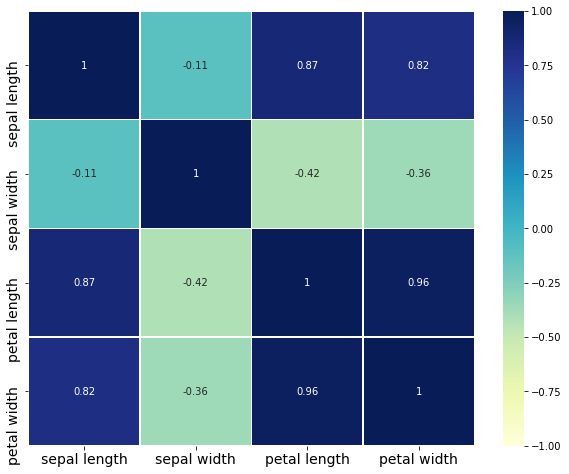

In [2]:
import seaborn as snb
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = df.corr() # Calcular la correlación

heat_map = snb.heatmap(corr, cmap="YlGnBu", annot = True, center = 0, linewidths=.5, vmin=-1, vmax=1)
plt.tick_params(labelsize = 14)


*   Standardize data ($\mu = 0$ and $\sigma^2 = 1$)

In [0]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)



*   Calculate the eigenvalues and eigenvectors (Weights or Loadings)

\\
$$\mathbf{A}=\begin{bmatrix}
a_{11} & a_{21}  & ... & a_{p1} \\ 
a_{21} & a_{22} & ...  & a_{p2}\\ 
 ... & ... & ...  & ... \\ 
 a_{1p}& a_{2p} & ...  & a_{pp}
\end{bmatrix}$$

In [0]:
from sklearn.decomposition import PCA
pca = PCA() #PCA(n_components=#)
principalComponents = pca.fit(x)


In [5]:
index_principal = ['PC'+str(i) for i in range(1, len(pca.components_)+1)]
components_analysis=pd.DataFrame(pca.components_, columns = features, index = index_principal)
cumulative_variance = 0
ExplainedVariance=[]
CumulativeVariance=[]
for variance in pca.explained_variance_ratio_:
  cumulative_variance = cumulative_variance + variance
  ExplainedVariance.append(variance)
  CumulativeVariance.append(cumulative_variance*100)

components_analysis['Explained Variance']= ExplainedVariance
components_analysis['Cumulative Variance %']= CumulativeVariance

components_analysis

,sepal length,sepal width,petal length,petal width,Explained Variance,Cumulative Variance %
PC1,0.522372,-0.263355,0.581254,0.565611,0.727705,72.770452
PC2,0.372318,0.925556,0.021095,0.065416,0.230305,95.800975
PC3,-0.721017,0.242033,0.140892,0.633801,0.036838,99.484807
PC4,-0.261996,0.124135,0.801154,-0.523546,0.005152,100.000000


*  Calculate x in the new dimensions

$$\mathbf{Y}_1 = \mathbf{a}_1^T \mathbf{X} = a_{11}X_1 + a_{12}X_2 + ... + a_{1p}X_p$$
$$\mathbf{Y}_2 = \mathbf{a}_2^T \mathbf{X} = a_{21}X_1 + a_{22}X_2 + ... + a_{2p}X_p$$
$$ ... $$
$$\mathbf{Y}_p = \mathbf{a}_p^T \mathbf{X} = a_{p1}X_1 + a_{p2}X_2 + ... + a_{pp}X_p$$


In [0]:
principalComponents = pca.transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = index_principal)

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

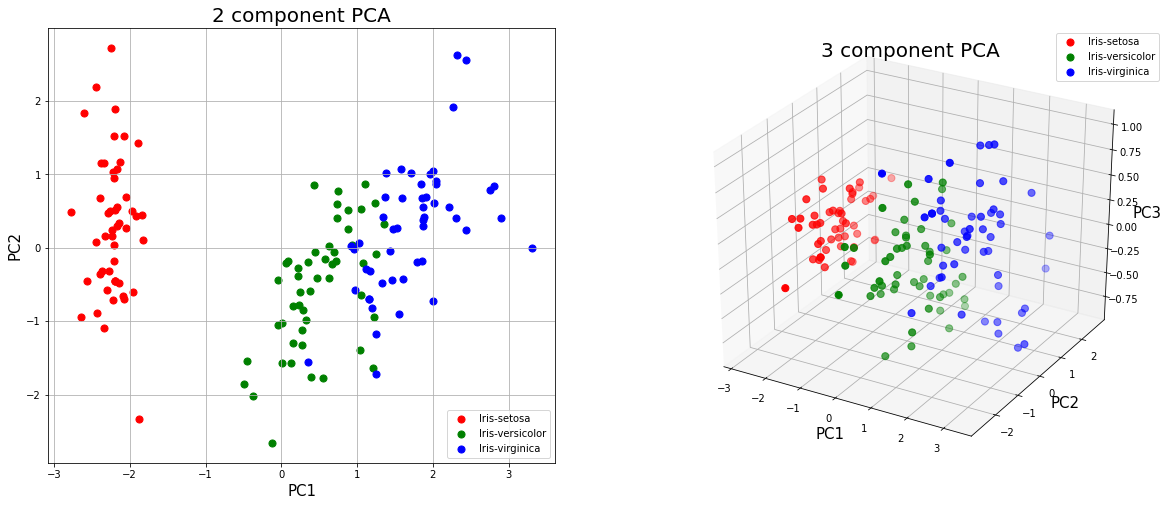

In [7]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1,2,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

ax = fig.add_subplot(1,2,2, projection='3d') 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)

ax.set_title('3 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## **PCA for mnist dataset (MNIST)**

The MNIST database of handwritten digits, has a training set of 63,000 examples, and a test set of 7,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

| Parameters | Number|
|------------|-------|
| Classes    | 10    |
| Samples per class    | ~ 7000 samples per class    |
| Samples total    | 70000    |
| Dimensionality    | 784    |
| Values    | integer values 0 to 255  |


In [0]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')


### Redundant information

In [9]:
pca = PCA()
pca.fit(mnist.data)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

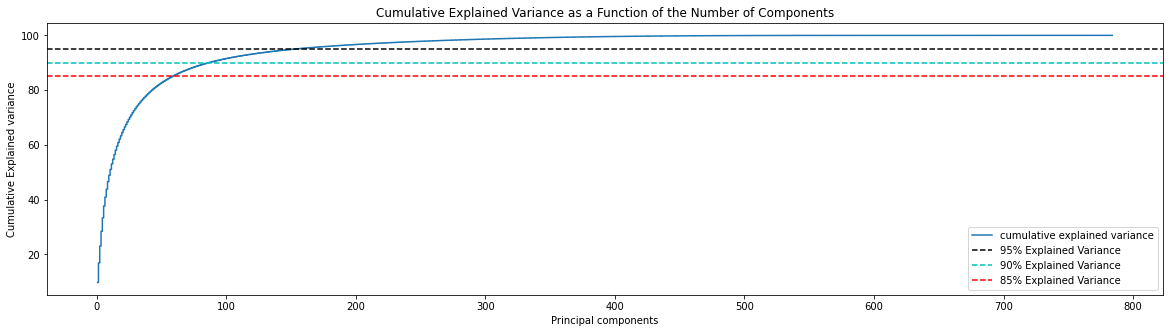

In [10]:
import numpy as np
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)*100

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(20, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()


In [0]:
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal, components

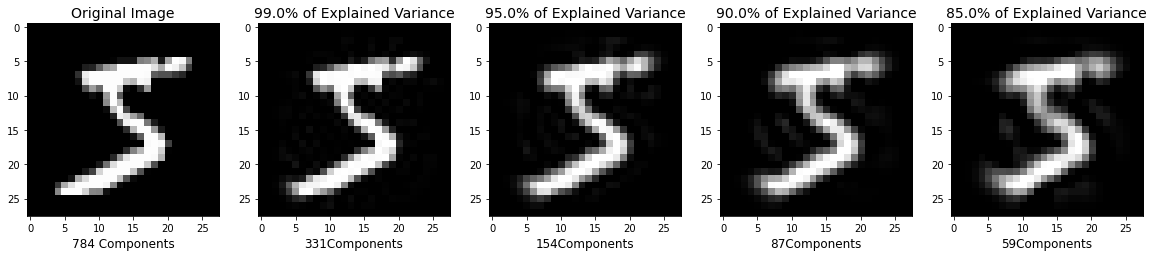

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.figure(figsize=(20,4));
# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(mnist.data[0].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

percentages = [0.99, 0.95, 0.90, 0.85]

for i,per in enumerate(percentages):
  plt.subplot(1, 5, i+2);
  pca_results, components = explainedVariance(per, mnist.data )
  plt.imshow( pca_results[0:][0].reshape(28, 28),
                cmap = plt.cm.gray, interpolation='nearest',
                clim=(0, 255));
  plt.xlabel(str(components.shape[1])+'Components', fontsize = 12)
  plt.title(str(per*100)+'% of Explained Variance', fontsize = 14);

 

### **PCA and Machine learning algoritms**
* Separate the database between Train and Test

---



In [0]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=0.10, random_state=0)

* Standardize data ($\mu = 0$) and ($\sigma = 1$)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)


#### PCA to improve performance

In [15]:
from time import time
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import warnings
from sklearn.tree import DecisionTreeClassifier

# percentages of cumulative variance
percentages=sorted(np.arange(0.5,1.05,0.05), reverse=True)

reporte={}
reporte['Variance Retained']=percentages
reporte['Number of Components']= []
reporte['Time DT']=[]
reporte['Accuracy DT']=[]




for i,per in enumerate(percentages):
  if per < 1:
    pca = PCA(per)
  else:
    pca=PCA()

  pca.fit(train_img)
  train_imgT = pca.transform(train_img)
  test_imgT = pca.transform(test_img) 
  
  
  f = DecisionTreeClassifier()
  # start training of decision tree 
  tiempo_inicial = time() 
  f = f.fit(train_imgT, train_lbl)
  tiempo_final = time()
  # finish training of decision tree

  reporte['Number of Components'].append(len(pca.components_))
  reporte['Time DT'].append(tiempo_final - tiempo_inicial)  
  reporte['Accuracy DT'].append(accuracy_score(test_lbl, f.predict(test_imgT)))

pd.DataFrame(reporte)


,Variance Retained,Number of Components,Time DT,Accuracy DT
0,1.00,784,165.020045,0.808714
1,0.95,329,73.441072,0.820857
2,0.90,236,53.364122,0.827571
3,0.85,185,41.289478,0.828857
4,0.80,149,33.148483,0.827143
5,0.75,120,26.741903,0.834857
6,0.70,98,21.146949,0.834429
7,0.65,79,16.543537,0.838000
8,0.60,63,13.033683,0.833857
9,0.55,50,9.764391,0.837000


#### PCA to Speed up Machine Learning Algorithms (Logistic Regression)

In [16]:
from sklearn.linear_model import LogisticRegression

percentages=sorted(np.arange(0.5,1.05,0.05), reverse=True)
reporte={}
reporte['Variance Retained']=percentages
reporte['Number of Components']= []
reporte['Time RL']=[]
reporte['Accuracy RL']=[]

warnings.filterwarnings('ignore')

for i,per in enumerate(percentages):
  if per < 1:
    pca = PCA(per)
  else:
    pca=PCA()

  pca.fit(train_img)
  train_imgT = pca.transform(train_img)
  test_imgT = pca.transform(test_img)  

  logisticRegr = LogisticRegression(solver = 'lbfgs')

  tiempo_inicial = time() 
  logisticRegr.fit(train_imgT, train_lbl)
  tiempo_final = time()


  reporte['Number of Components'].append(len(pca.components_))
  reporte['Time RL'].append(tiempo_final - tiempo_inicial)
  reporte['Accuracy RL'].append(logisticRegr.score(test_imgT, test_lbl))


pd.DataFrame(reporte)


,Variance Retained,Number of Components,Time RL,Accuracy RL
0,1.00,784,32.653404,0.920143
1,0.95,329,16.717564,0.924286
2,0.90,236,14.107850,0.924143
3,0.85,185,12.513585,0.923143
4,0.80,149,11.474291,0.922143
5,0.75,120,10.820369,0.922286
6,0.70,98,10.003049,0.919429
7,0.65,79,9.648143,0.914571
8,0.60,63,9.504351,0.910286
9,0.55,50,8.862668,0.908000


### Multidimensional Scaling 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


In [0]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the targetesperar ca
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [0]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances
mds = MDS(n_components=2,dissimilarity = 'precomputed', random_state=60)
similarities_euclidean = euclidean_distances(x)
multidimensionalScaling_euclidean = mds.fit_transform(similarities_euclidean)
principalDf_euclidean = pd.DataFrame(data = multidimensionalScaling_euclidean
             , columns = ['MDS1', 'MDS2'])

finalDf_euclidean = pd.concat([principalDf_euclidean, df[['target']]], axis = 1)

In [0]:
from sklearn.metrics.pairwise import manhattan_distances
mds_manhatan = MDS(n_components=2,dissimilarity = 'precomputed', random_state=60, metric = True)
similarities_manhatan = manhattan_distances(x)
multidimensionalScaling_manhatan = mds.fit_transform(similarities_manhatan)
principalDf_manhatan = pd.DataFrame(data = multidimensionalScaling_manhatan
             , columns = ['MDS1', 'MDS2'])

finalDf_manhatan = pd.concat([principalDf_manhatan, df[['target']]], axis = 1)

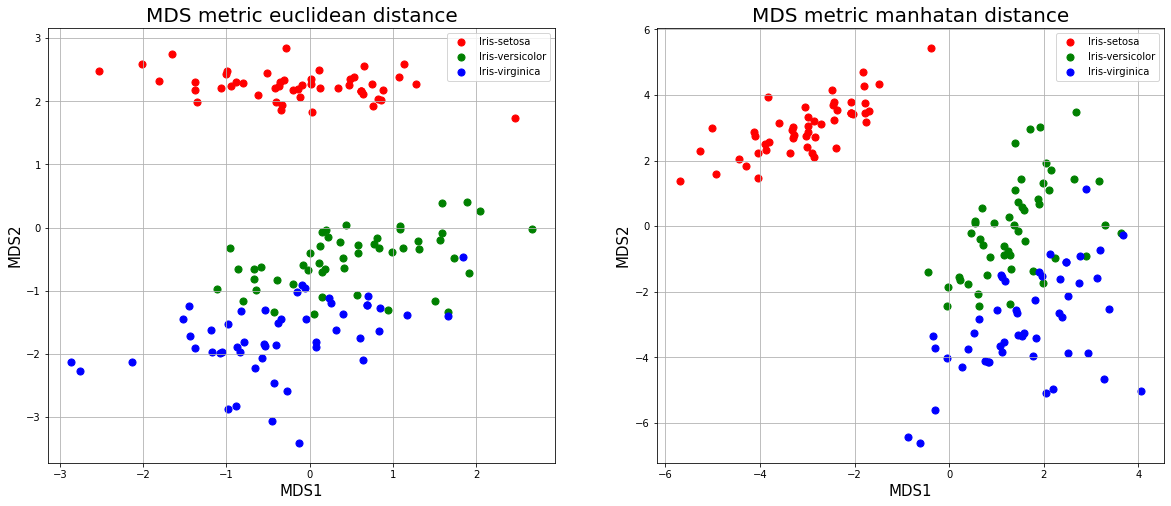

In [21]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1,2,1) 
ax.set_xlabel('MDS1', fontsize = 15)
ax.set_ylabel('MDS2', fontsize = 15)
ax.set_title('MDS metric euclidean distance', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_euclidean['target'] == target
    ax.scatter(finalDf_euclidean.loc[indicesToKeep, 'MDS1']
               , finalDf_euclidean.loc[indicesToKeep, 'MDS2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
ax = fig.add_subplot(1,2,2) 
ax.set_xlabel('MDS1', fontsize = 15)
ax.set_ylabel('MDS2', fontsize = 15)
ax.set_title('MDS metric manhatan distance', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_manhatan['target'] == target
    ax.scatter(finalDf_manhatan.loc[indicesToKeep, 'MDS1']
               , finalDf_manhatan.loc[indicesToKeep, 'MDS2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


